In [110]:
#importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Question0

In [111]:
titanic = pd.read_csv('titanic-passengers.csv',sep=";") #data import

df = titanic.copy() #data copy

In [112]:
df.head()    #show the general informations

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [113]:
df.isnull().sum()  #find all missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [114]:
#replace missing Age values with median

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [115]:
#replace missing Embarked values with mode
df['Embarked'].mode()
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [116]:
# replace missings values Cabin wwith the frequent value
df['Cabin'].fillna('G6', inplace=True) 

In [117]:
#
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [118]:
#Extract Title from passager name

df['Title'] = titanic['Name'].map(\
    lambda name: name.split(',')[1]\
    .split('.')[0].strip()
)


In [119]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [120]:
df['Title'] = df.Title.map(Title_Dictionary)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S,Mrs
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S,Mrs
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs


In [121]:
#Transform the object type values to numerical values(Title).
encoder=LabelEncoder()
df['Title']=encoder.fit_transform(df['Title'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S,2
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S,2
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S,2
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S,2
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C,2
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C,2
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S,1
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S,2


In [122]:
#Transform the object type values to numerical values(survived).
df.replace({'Survived':{'No':0,'Yes':1}}, inplace=True)

In [123]:
df.replace({'Sex':{'male':0,'female':1}}, inplace=True)

In [124]:
#create familysize
df['FamilySize'] = df['SibSp'] + df['Parch'] +1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S,2,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,2,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S,2,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S,2,5
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,2,2


In [125]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,G6,S,2,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,F G73,S,2,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,G6,S,2,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,G6,S,2,5
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S,2,2


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int32  
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int32(1), int64(7), object(4)
memory usage: 94.1+ KB


# Question 1

In [127]:
#A training set and Testing set Apply decision tree

#features extraction
x = df[['Pclass','Sex','Age','Fare','FamilySize','Title']]
y = df['Survived']

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf = tree.DecisionTreeClassifier(criterion="gini", splitter='random', max_leaf_nodes=10, min_samples_leaf=5, max_depth=5) 
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.8044692737430168


# Question 2

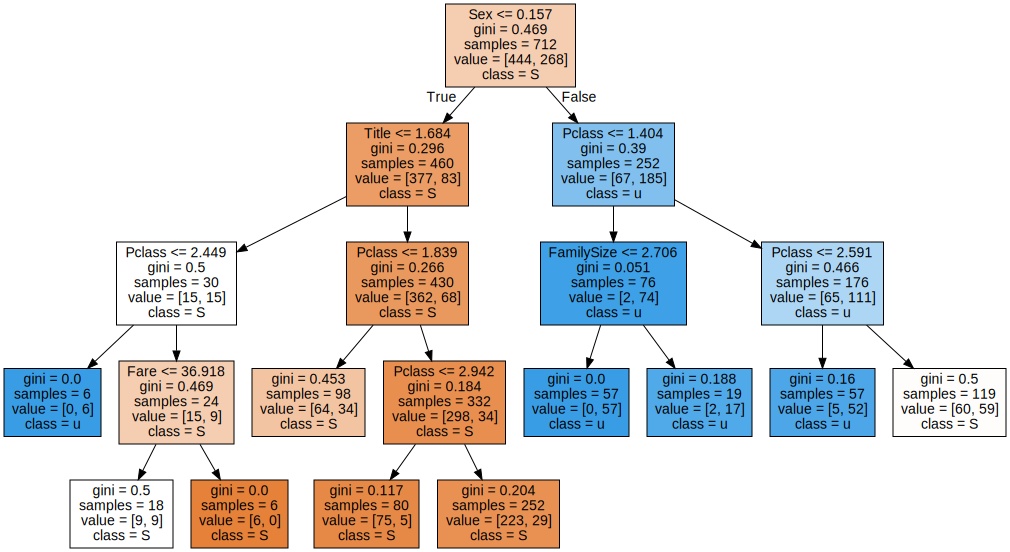

In [128]:
#Plot your decision tree and try to read the tree branches

from sklearn.tree import export_graphviz
import graphviz

# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=x.columns,  
                                class_names='Survived',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


# Question 3

In [129]:
#Change the decision tree parameters(change at least two parameters)

clf = tree.DecisionTreeClassifier(criterion="gini", splitter='random', max_leaf_nodes=50, min_samples_leaf=5, max_depth=20) 
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


# Question 4

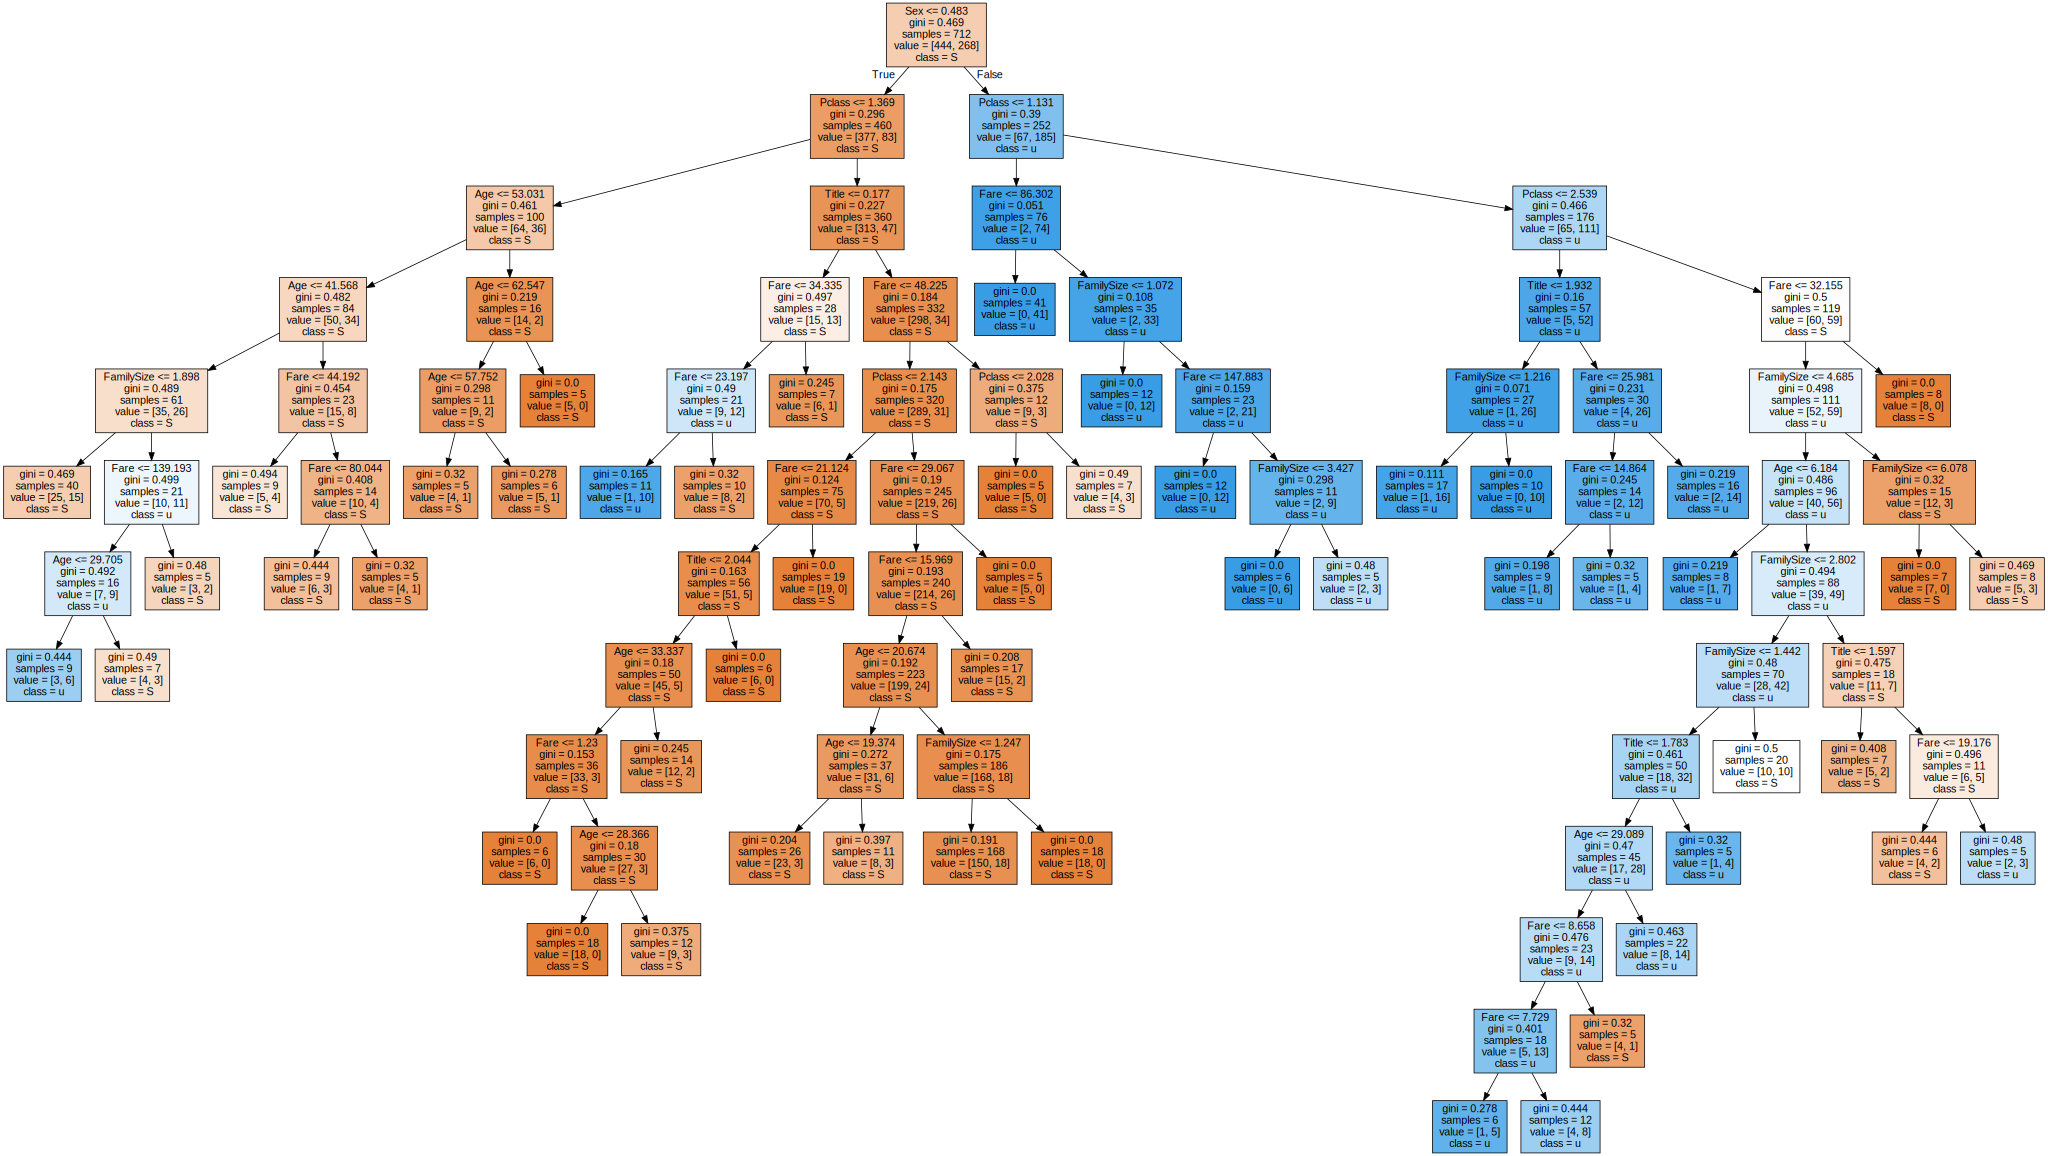

In [130]:
#Calculate the new accuracy and compare it with the previous results.

from sklearn.tree import export_graphviz
import graphviz
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=x.columns,
                                class_names='Survived',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Question 5

In [131]:
#Use random forest then change the number of estimators

from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=200) #Creating a random forest with 100 decision trees
random_forest.fit(x_train, y_train) #Training our model

RandomForestClassifier(n_estimators=200)

# Question 6

In [132]:
# Calculate the new accuracy and compare it with the previous result.

Y_prediction = random_forest.predict(x_test) #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, Y_prediction))  #Measuring the accuracy of our model

Accuracy: 0.8547486033519553


we can note that the random forest has a better prediction (84%) than the "decision tree" (80%)